<a href="https://colab.research.google.com/github/nkosimate/CustomerChurnPrediction/blob/main/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction

This notebook uses the data set from [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

This project will be an end-to-end data science project as it’s usually practiced in real-world scenaries — from raw problem to deployed solution:



## 1. Definie the Problem and Business understanding

Using the dataset we understand that we are a telecom company providing sercice to customers and we need to predict if a customer will churn (leave) the company in the coming month.

Our goal is to reduce churn rate, keep customers longer and improve revenue stability



## 2. Data Collection and Understanding the Data (EDA)

### Loading the data

To begin the process we need to first need to load the data

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Telco-Customer-Churn.csv')
df.head()
# Loading the data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


From the above we find out our dataset has 7043 customers with 21 features including our target feature churn, there seems to be no missing data with some data type issues such as TotalCharges being stored as an object. We can tell that customerID will be unique for every customer so will most liekly be dropped. Lastly since our target variable is either yes or no we can also do some binary encoding on it as well.

These are just a few key take aways from the initial loading of data and getting a summary of the data.

### Exploratory Data Analysis

Since it is difficult for us humans to make sense of a raw data table, it is often useful to visualize the
data

First a simple check to see if there is a class imbalance should be carried out.

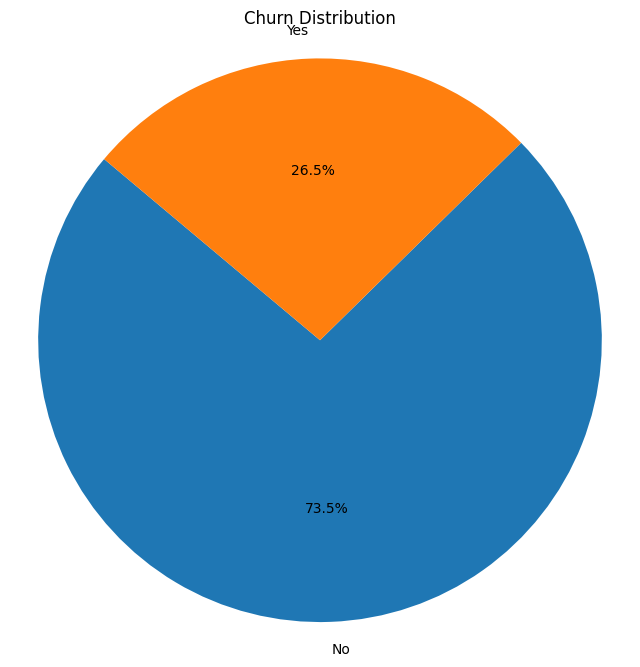


Churn counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [14]:
import matplotlib.pyplot as plt

# Count the occurrences of each category in the 'Churn' column
churn_counts = df['Churn'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('churn_pie_chart.png')
plt.show()

# Print the churn counts
print("\nChurn counts:")
print(churn_counts)

In [24]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [21]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [27]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)